# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [102]:
from pandas_datareader import data as web
import yfinance as yf

import plotly.express as px
from plotly import graph_objects
from plotly.graph_objs import Layout

import pandas as pd
import numpy as np

#### 1. Carregue os dados da tarefa anterior

In [49]:
df = pd.read_csv('input/df_ativos.csv').drop(columns=['Unnamed: 0'])
df.head(3)


,Date,Ticker,Close,High,Low,Open,Volume
0,2023-02-10,BBDC3.SA,10.015411,10.231447,9.877149,10.015411,21015100
1,2023-02-10,EMBR3.SA,16.120001,16.459999,15.900000,16.299999,7474000
2,2023-02-10,GGBR4.SA,20.223604,20.837738,20.023652,20.316438,22591926


In [51]:
df_ativos = df.pivot(index='Date', columns='Ticker')
df_ativos.head()

Close                             High                        \
Ticker       BBDC3.SA   EMBR3.SA   GGBR4.SA   BBDC3.SA   EMBR3.SA   GGBR4.SA   
Date                                                                           
2023-02-10  10.015411  16.120001  20.223604  10.231447  16.459999  20.837738   
2023-02-13  10.309221  16.000000  20.416410  10.326504  16.200001  20.487821   
2023-02-14  10.283295  16.240000  20.466396  10.412917  16.340000  20.844875   
2023-02-15  10.482049  16.420000  20.380707  10.559822  16.450001  20.573518   
2023-02-16  10.559822  16.240000  20.609221  10.689443  16.400000  20.994840   

                  Low                             Open                        \
Ticker       BBDC3.SA   EMBR3.SA   GGBR4.SA   BBDC3.SA   EMBR3.SA   GGBR4.SA   
Date                                                                           
2023-02-10   9.877149  15.900000  20.023652  10.015411  16.299999  20.316438   
2023-02-13   9.963564  15.780000  19.573760  10.024054  16.160000  20.016509   
2023-02-14  10.205523  15.950000  20.245023  10.326502  16.070000  20.602078   
2023-02-15  10.205524  16.120001  20.116485  10.257372  16.200001  20.423553   
2023-02-16  10.317862  16.110001  20.459258  10.378352  16.379999  20.459258   

              Volume                     
Ticker      BBDC3.SA EMBR3.SA  GGBR4.SA  
Date                                     
2023-02-10  21015100  7474000  22591926  
2023-02-13   8853100  4906500  11853576  
2023-02-14   8694300  5565600  11007864  
2023-02-15  14487500  6523400  11745972  
2023-02-16   9736000  4626500  12189870

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [70]:
#2.1 Calcular a media em uma janela móvel de 90 dias
media_90d = df_ativos['Close'].rolling(window=90).mean()

media_90d = media_90d.stack().reset_index()
media_90d.columns = ['data', 'ativo', 'media']

media_90d.head()

,data,ativo,media
0,2023-06-23,BBDC3.SA,10.982798
1,2023-06-23,EMBR3.SA,18.767667
2,2023-06-23,GGBR4.SA,19.258102
3,2023-06-26,BBDC3.SA,11.013078
4,2023-06-26,EMBR3.SA,18.778111


In [71]:
#2.2 Calcular o desvio padrão em uma janela móvel de 90 dias
desvio_padrao_90d = df_ativos['Close'].rolling(window=90).std()

desvio_padrao_90d = desvio_padrao_90d.stack().reset_index()
desvio_padrao_90d.columns = ['data', 'ativo', 'desvio_padrao']

desvio_padrao_90d.head()

,data,ativo,desvio_padrao
0,2023-06-23,BBDC3.SA,0.938348
1,2023-06-23,EMBR3.SA,1.536499
2,2023-06-23,GGBR4.SA,0.779967
3,2023-06-26,BBDC3.SA,0.950671
4,2023-06-26,EMBR3.SA,1.521420


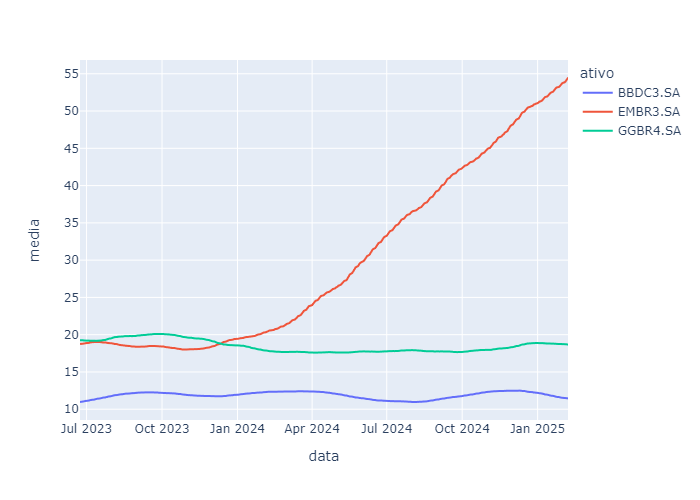

In [107]:
#2.3 -grafico item 2.1
fig = px.line(media_90d, x="data", y="media", color='ativo')
fig.show('png')

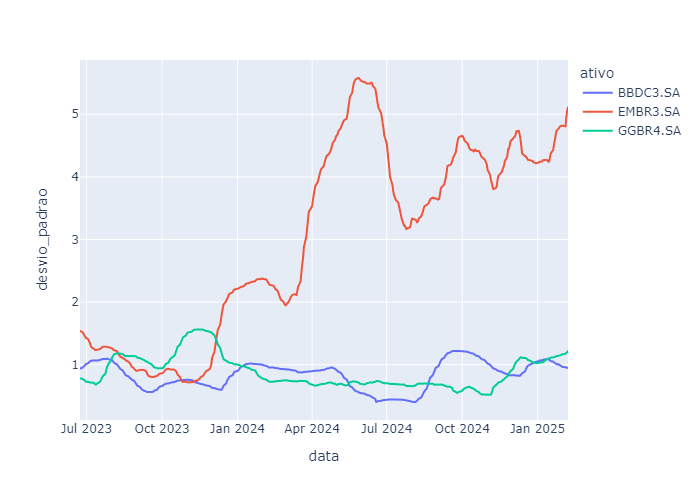

In [106]:
#2.4 -grafico item 2.2
fig = px.line(desvio_padrao_90d, x="data", y="desvio_padrao", color='ativo')
fig.show('png')

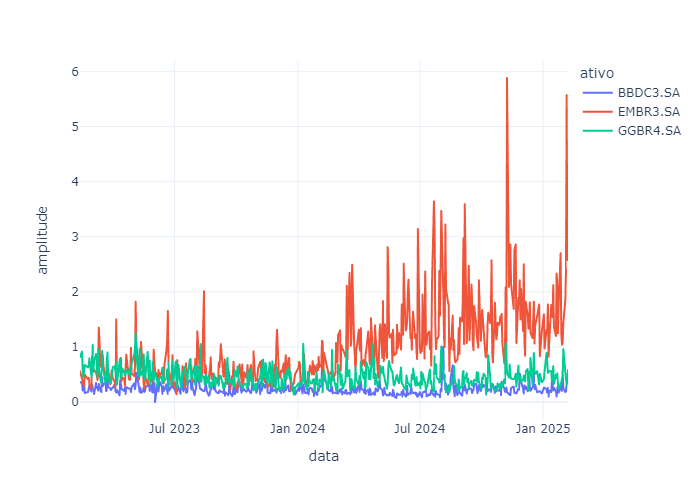

In [105]:
#2.5 
amplitude_variacao = np.abs(df_ativos['High'] - df_ativos['Low']).stack().reset_index().rename(columns={'Date':'data','Ticker':'ativo',0:'amplitude'})

fig = px.line(amplitude_variacao, x="data", y="amplitude", color='ativo', template='plotly_white')
fig.show('png')

> sim há uma semelhança no comportamento dos graficos dos ativos, um aumento na media, desvio e amplitude de EMBR3 e uma estabilidade na media, desvio e amplitude de BBDC3 e GGBR4

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [100]:
#3.1
embr3 = df_ativos.loc['2024-08-01':, (['Close', 'High', 'Low', 'Open', 'Volume'], 'EMBR3.SA')]
embr3.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
embr3


,Close,High,Low,Open,Volume
Date,,,,,
2024-08-01,42.020000,44.090000,41.700001,43.869999,6552500
2024-08-02,39.250000,42.290001,38.820000,42.029999,10930100
2024-08-05,38.730000,39.400002,37.419998,37.799999,9411400
2024-08-06,38.400002,39.180000,38.000000,38.509998,9057900
2024-08-07,38.130001,38.799999,37.799999,38.700001,6016200
...,...,...,...,...,...
2025-02-03,59.419998,59.900002,58.060001,59.849998,6188700
2025-02-04,57.459999,59.599998,57.180000,59.419998,6654600
2025-02-05,66.370003,66.580002,61.009998,61.500000,22064200


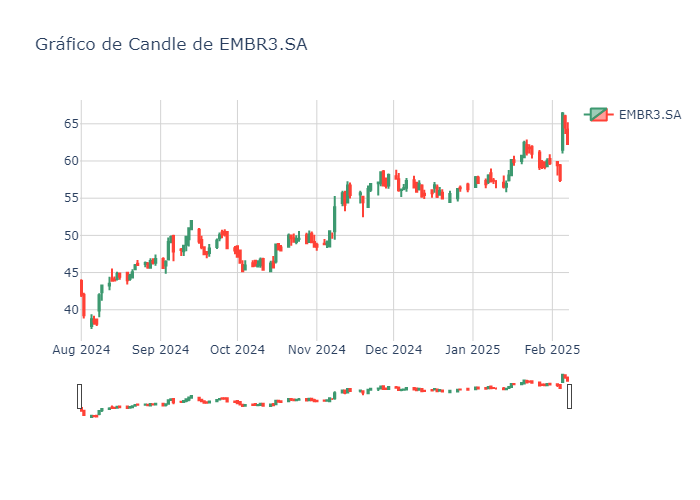

In [108]:
#3.2
graph = {
    'x': embr3.index,
    'open': embr3.Open,
    'close': embr3.Close,
    'high': embr3.High,
    'low': embr3.Low,
    'type': 'candlestick',
    'name': 'EMBR3.SA',
    'showlegend': True
}

layout = Layout(
    paper_bgcolor='white',
    plot_bgcolor='white'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Gráfico de Candle de EMBR3.SA",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico.show('png')